In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from numpy import argmax

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:5000]
y_train = y_train[:5000]
x_train = x_train.astype('float32').reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.astype('float32').reshape(x_test.shape[0], 28, 28, 1)
x_train /= np.max(x_train)
x_test /= np.max(x_test)

n = 5
indices = np.random.randint(x_test.shape[0], size=n)
x_test_sample = x_test[indices, :]
y_test_sample = y_test[indices]

def predict(model):
  predictions = model.predict(x_test_sample)
  plt.figure(figsize=(10, 4))
  
  for i, (y1, y2) in enumerate(zip(y_test_sample, predictions)):
    print('Sample %d: true = %s, predicted = %s' %(i + 1, y1, argmax(y2)))

  plt.show()

def display(history):
  plt.title(label='Model Loss by Epoch', loc='center')
  plt.plot(history.history['loss'], label='Training Data', color='red')
  plt.plot(history.history['val_loss'], label='Test Data', color='black')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='upper right')
  plt.show()

11490434/11490434 [==============================] - 0s 0us/step


Epoch 1/5
157/157 [==============================] - 64s 372ms/step - loss: 0.3678 - accuracy: 0.8884 - val_loss: 0.1597 - val_accuracy: 0.9530
Epoch 2/5
157/157 [==============================] - 31s 201ms/step - loss: 0.0867 - accuracy: 0.9754 - val_loss: 0.1383 - val_accuracy: 0.9536
Epoch 3/5
157/157 [==============================] - 31s 201ms/step - loss: 0.0418 - accuracy: 0.9866 - val_loss: 0.1541 - val_accuracy: 0.9530
Epoch 4/5
157/157 [==============================] - 32s 206ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.1403 - val_accuracy: 0.9604
Epoch 5/5
157/157 [==============================] - 31s 199ms/step - loss: 0.0100 - accuracy: 0.9976 - val_loss: 0.1187 - val_accuracy: 0.9678
313/313 - 9s - loss: 0.1187 - accuracy: 0.9678 - 9s/epoch - 30ms/step


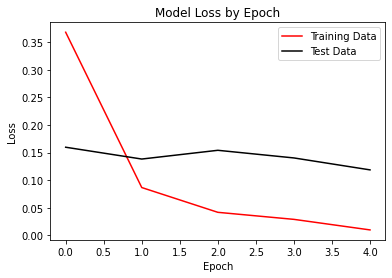

In [2]:
model = Sequential()

model.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
display(history)

In [18]:
predict(model)

1/1 [==============================] - 0s 27ms/step
Sample 1: true = 1, predicted = 1
Sample 2: true = 3, predicted = 3
Sample 3: true = 5, predicted = 5
Sample 4: true = 0, predicted = 0
Sample 5: true = 9, predicted = 9


<Figure size 720x288 with 0 Axes>

Epoch 1/5
157/157 [==============================] - 12s 72ms/step - loss: 0.6269 - accuracy: 0.8052 - val_loss: 0.1898 - val_accuracy: 0.9436
Epoch 2/5
157/157 [==============================] - 10s 66ms/step - loss: 0.2197 - accuracy: 0.9380 - val_loss: 0.1274 - val_accuracy: 0.9580
Epoch 3/5
157/157 [==============================] - 11s 69ms/step - loss: 0.1471 - accuracy: 0.9576 - val_loss: 0.1125 - val_accuracy: 0.9633
Epoch 4/5
157/157 [==============================] - 8s 54ms/step - loss: 0.1112 - accuracy: 0.9664 - val_loss: 0.0941 - val_accuracy: 0.9693
Epoch 5/5
157/157 [==============================] - 12s 79ms/step - loss: 0.0857 - accuracy: 0.9724 - val_loss: 0.0926 - val_accuracy: 0.9688
313/313 - 3s - loss: 0.0926 - accuracy: 0.9688 - 3s/epoch - 9ms/step


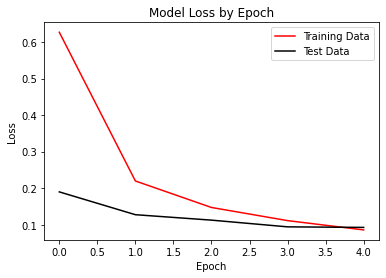

In [3]:
# with Dropout
model = Sequential()

model.add(Conv2D(32, 3, input_shape=(28, 28, 1), padding='same', activation='relu', strides=2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.evaluate(x_test,  y_test, verbose=2)
display(history)

Epoch 1/5
79/79 [==============================] - 19s 214ms/step - loss: 0.4414 - accuracy: 0.8690 - val_loss: 5.7194 - val_accuracy: 0.1135
Epoch 2/5
79/79 [==============================] - 17s 218ms/step - loss: 0.1571 - accuracy: 0.9530 - val_loss: 7.9763 - val_accuracy: 0.1135
Epoch 3/5
79/79 [==============================] - 15s 192ms/step - loss: 0.1205 - accuracy: 0.9636 - val_loss: 6.9144 - val_accuracy: 0.1135
Epoch 4/5
79/79 [==============================] - 17s 213ms/step - loss: 0.1030 - accuracy: 0.9688 - val_loss: 4.5875 - val_accuracy: 0.1150
Epoch 5/5
79/79 [==============================] - 16s 199ms/step - loss: 0.0772 - accuracy: 0.9772 - val_loss: 3.2048 - val_accuracy: 0.1988
313/313 - 6s - loss: 3.2048 - accuracy: 0.1988 - 6s/epoch - 18ms/step


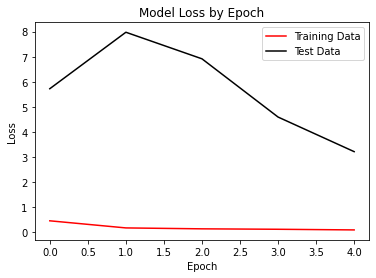

In [4]:
# with Dropout, BatchNormalization, MaxPooling2D
model = Sequential()

model.add(Conv2D(32, 3, input_shape=(28, 28, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

history = model.fit(train_generator, epochs=5, validation_data=test_generator)
model.evaluate(x_test,  y_test, verbose=2)
display(history)